#### TikTok Reviews Sentiment Analysis using Python

The dataset I am using here for the task of TikTok reviews sentiment analysis is downloaded from Kaggle. It was originally collected from TikTok reviews on Google Play Store.


In [2]:
pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivkumarganesh/tiktok-google-play-store-review")

print("Path to dataset files:", path)

100%|██████████| 42.8M/42.8M [00:00<00:00, 86.1MB/s]

Extracting files...


Path to dataset files: /home/a87a5f2c-cdc8-4c09-ab57-607b26c09188/.cache/kagglehub/datasets/shivkumarganesh/tiktok-google-play-store-review/versions/3


In [22]:
data = pd.read_csv("/home/a87a5f2c-cdc8-4c09-ab57-607b26c09188/.cache/kagglehub/datasets/shivkumarganesh/tiktok-google-play-store-review/versions/3/tiktok_google_play_reviews.csv")
print(data)

/tmp/ipykernel_780/2093313546.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/home/a87a5f2c-cdc8-4c09-ab57-607b26c09188/.cache/kagglehub/datasets/shivkumarganesh/tiktok-google-play-store-review/versions/3/tiktok_google_play_reviews.csv")


                                    reviewId              userName  \
0       68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1       d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2       96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3       078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4       8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   
...                                      ...                   ...   
460282  73cf78fe-599d-4488-8a8b-ae443847303b           hera killar   
460283  16d331c8-ba21-4aeb-ac01-dec455ca48ad        Hiox Softwares   
460284  fbb86777-b885-4f76-b49e-13e424aa5afc       Md. Zahid Hasan   
460285  28df682c-bb17-4224-8658-642a92a2c723              Ash Ryan   
460286  1cfbb2b3-fb0b-4f4b-8963-9e2b803f24dc           Haroon Jaan   

                                                userImage  \
0       https://play-lh.googleusercontent.com/a/ALm5wu...   
1       https://play-lh.googleusercon

In [8]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ee/d3/67ccdab9d2756f8b30b0669015840cd5fdb5f062a2d621d67f033cf3dd54/wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 10.3 MB/s eta 0:00:000:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re

In [24]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

print(data.head())

                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/a87a5f2c-cdc8-4c09-ab57-
[nltk_data]     607b26c09188/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
"""On the first impressions of this dataset, I can see null values in some columns. 
To analyze TikTok reviews, we only need two columns, content and score; 
So let’s create a new dataset with just these two columns and take a step further with TikTok reviews sentiment analysis:"""

data = data[["content", "score"]]
print(data.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


In [28]:
#Check for null values
print(data.isnull().sum())

content    31
score       0
dtype: int64


In [30]:
#Let’s drop the null values and move further
data = data.dropna()

In [32]:
#Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)


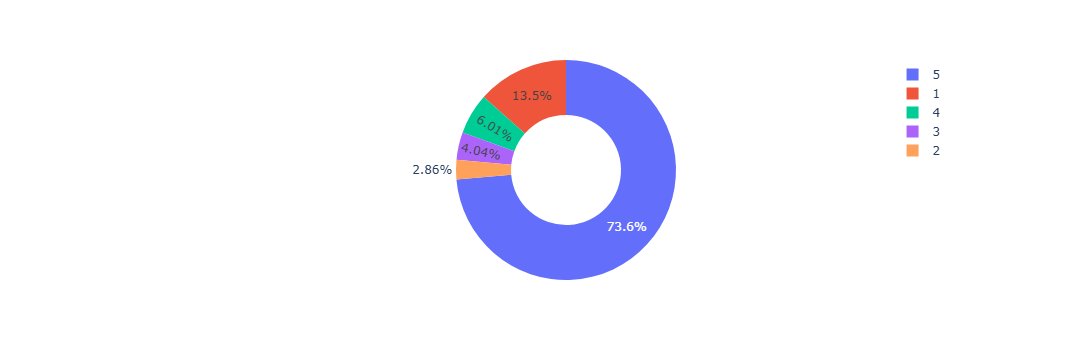

In [33]:
#Now let’s have a look at the percentages of ratings given to TikTok on the Google Play store:

ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

You can see that 73.6% of the users have given five ratings to TikTok, and 13.5% of the users have rated it with 1. Now let’s have a look at the kind of words the users use in the reviews of TikTok:

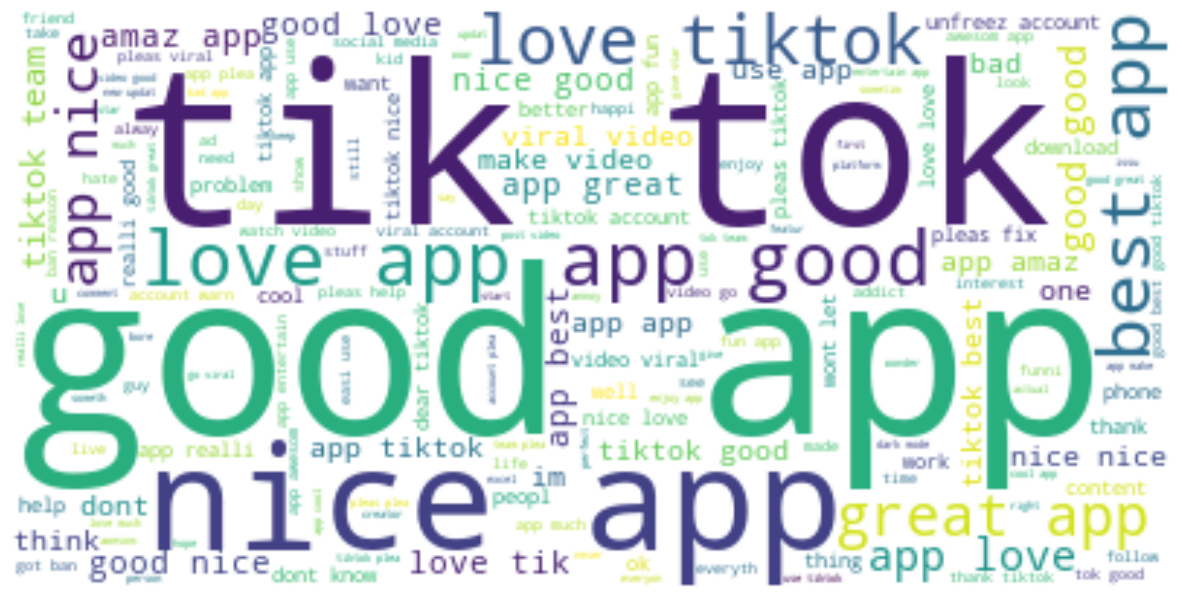

In [37]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/a87a5f2c-cdc8-4c09-ab57-
[nltk_data]     607b26c09188/nltk_data...


In [ ]:
#Now let’s have a look at the kind of words people use in the positive reviews of TikTok:

positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Now let’s have a look at the kind of words people often use in the negative reviews of TikTok:

negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()